<a href="https://colab.research.google.com/github/Data-Analytics-with-Python/individual-assignment-i-torkelfaa/blob/main/Assignment_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANT: Before you start, enter your name and student number below.

**Full Name:**

**Student Number:**

# Exploring Customer Data with Pandas

Use the provided Nata Supermarkets dataset to answer the following questions.
Your goal is to use Pandas operations to explore, clean, and summarize the data, and to draw a few simple insights about customer demographics and behavior.

Please complete all task requested and answer all questions explicitly and support your answers with Python codes. Insert code and text cells as you need.

## 1. Inspecting and loading the Data (10pts)

* Save the dataset in the case supplementary file (in Excel) as a csv file.

* Load the dataset as a pandas data frame and display the first few rows. (Note: you may upload it to your Colab storage space and load it from there.)

    * How many features (columns) and records (rows) are in the dataset?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv('/content/nata_supermarket.csv', sep = ';')

print(f'The nata_supermarket.csv file has {df.shape[0]} rows and {df.shape[1]} columns')
df.head()

The nata_supermarket.csv file has 2240 rows and 29 columns


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,09/04/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,03/08/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,02/10/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## 2. Data Cleaning and Missing Values (14pts)

* Check for missing values across all columns.

* Which columns contain missing data, and how many missing entries are there?

* What strategies could you use to handle them (drop, fill, or ignore)? Apply one reasonable approach and explain your choice.

In [3]:
missing = df.isnull().sum()

for column, value in missing.items():
    if value > 0:
        print(f"Column '{column}' is missing {value} values.")

df = df.dropna()

# Note that after df.dropna() command, the command before does not do anything.
# Simply re-importing the file will again show the missing column and values.

# df.dropna() is used because we have 2240 rows with only 24 missing, so deleting them will not affect the dataset in any meaningful way.
# An common alternative if it is important to keep datapoints is to use df.fillna() with the mean/median value to keep bias to a minimum.

Column 'Income' is missing 24 values.


## 3. Removing Constant Columns (14pts)

* Identify any columns with constant values (no variance; all rows have the same value).

* Drop them from your DataFrame and confirm how many columns remain.

In [4]:
df = df.loc[:, df.nunique() != 1]

print(f'{df.shape[1]} columns remain')


27 columns remain


## 4. Add a new column (15pts)

* Add a new column **Customer_Days** to store the total number of days each customer has been with the company. You may follow the steps below:
  * use `pd.to_datetime(df["Dt_Customer"])` to convert the string variable to a *date-time* variable

  * use `today = datetime.today()` to find the date of today

  * use `(today - df["Dt_Customer"]).dt.days` to find the difference between today and the onbard date.

In [5]:
df['Dt_Customer'] = df['Dt_Customer'].astype(str).str.replace('-', '/', regex=False)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

In [6]:
df['Customer_Days'] = (datetime.today() - df['Dt_Customer']).dt.days
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,4,7,0,0,0,0,0,0,1,4945
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,2,5,0,0,0,0,0,0,0,4099
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,4446
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,4,6,0,0,0,0,0,0,0,4039
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,4295


## 5. Categorical Features (15 pts)

* For `Education` and `Marital_Status`,

  * find how many customers fall into each category
  * create pie charts to show the percentage of each category; make sure to show the percentage numbers on the chart with 2 decimal places

* What do you findings suggest about the company's target demographic?

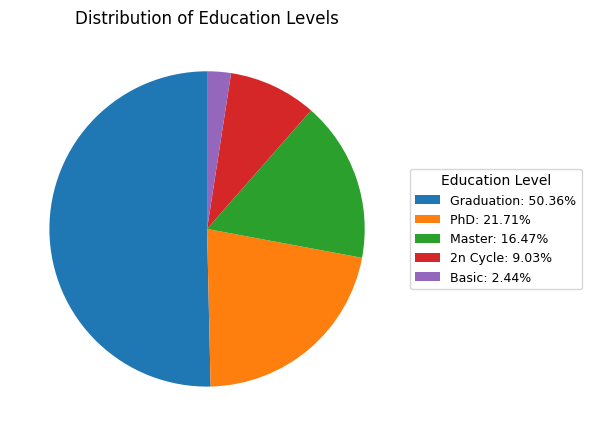

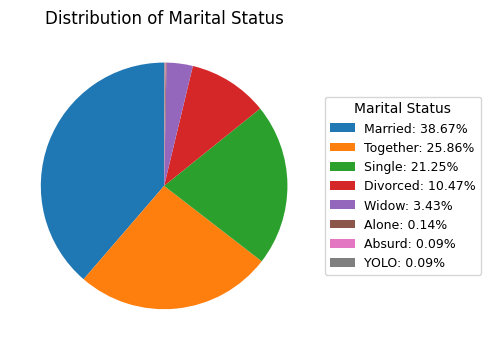

In [7]:
counts_education = df['Education'].value_counts()
counts_marital_status = df['Marital_Status'].value_counts()

# Education chart

plt.figure(figsize=(6, 6))
wedges, texts = plt.pie(
    counts_education,
    startangle=90
)

plt.legend(
    [f"{label}: {100*value/counts_education.sum():.2f}%"
     for label, value in zip(counts_education.index, counts_education.values)],
    title="Education Level",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=9
)

plt.title("Distribution of Education Levels")
plt.tight_layout()
plt.show()

# Martial Status chart

plt.figure(figsize=(5,5))
wedges, texts = plt.pie(
    counts_marital_status,
    startangle=90
)

plt.legend(
    [f"{label}: {100*value/counts_marital_status.sum():.2f}%"
     for label, value in zip(counts_marital_status.index, counts_marital_status.values)],
    title="Marital Status",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=9
)

plt.title("Distribution of Marital Status")
plt.tight_layout()
plt.show()

# The pie chart shows a high level of educated couples (married/together) among the demographic.


## 6. Numeric Variables (15pts)

* For `Income`, `Kidhome`, and `Teenhome`,
  * use boxplots to visualize their distributions.

* Based on these distributions, what can you say about the typical household profile of Nata's customers?

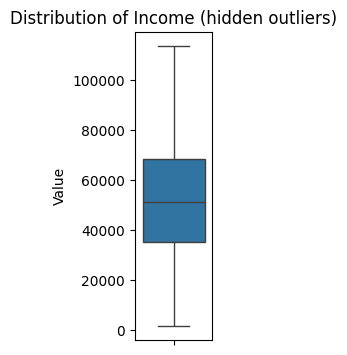

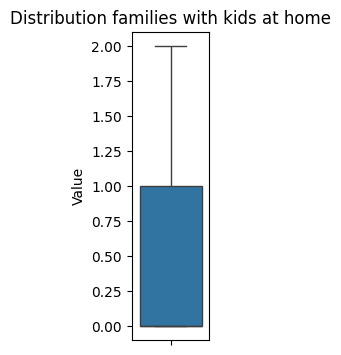

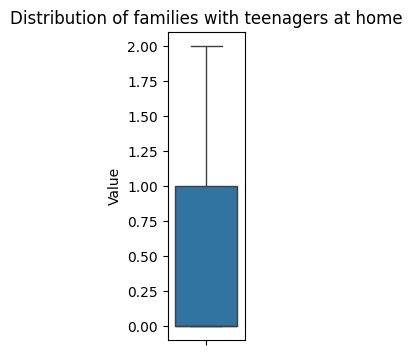

In [11]:
plt.figure(figsize=(1, 4))
sns.boxplot(data=df['Income'], showfliers = False)
plt.title('Distribution of Income (hidden outliers)')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(1, 4))
sns.boxplot(data=df['Kidhome'])
plt.title('Distribution families with kids at home')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(1, 4))
sns.boxplot(data=df['Teenhome'])
plt.title('Distribution of families with teenagers at home')
plt.ylabel('Value')
plt.show()

# We can see that 50% of households earn between ≈ 35.000 and ≈ 70.000 (currency and period is not listed)
# The distribution for teenagers at home is seemingly identical to the distribution of children at home.
# Further we see that 50% of household has 0 kids/teenagers at home.
# 75% of households has 0 or 1 child/teenager at home as the median and lower quartile is at 0.
# Since a person is only an integer, 25% of households has 2 children.


## 7. Spending by Products (15pts)

* Examine the spending amount columns `MntWines`,	`MntFruits`,	`MntMeatProducts`,	`MntFishProducts`,	`MntSweetProducts`,	`MntGoldProds`, and find the product with the highest total spending amount by all customers.



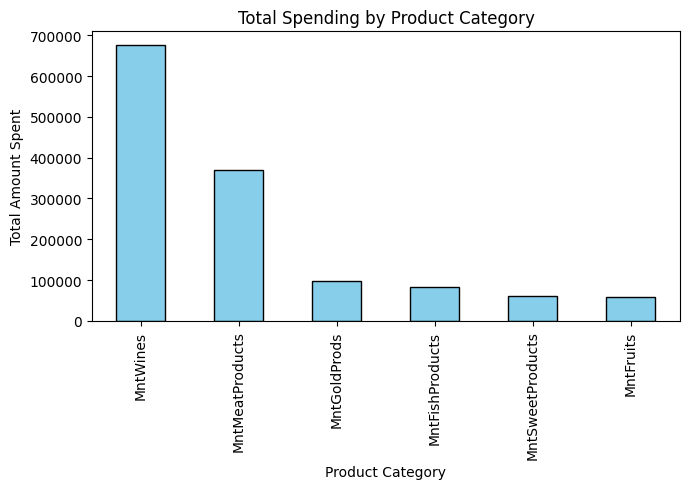

The product with the highest total spending is MntWines with a total of 676083.00.


In [10]:
product_columns = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

# spending or each product
total_spending = df[product_columns].sum().sort_values(ascending=False)

# plot
plt.figure(figsize=(7, 5))
total_spending.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Spending by Product Category')
plt.ylabel('Total Amount Spent')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()

# produc with highest spending
top_product = total_spending.idxmax()
top_value = total_spending.max()
print(f"The product with the highest total spending is {top_product} with a total of {top_value:.2f}.")

## 8. Use of Gen. AI (2pts)

Use of Generative AI is allowed. Briefly describe if and how you have used Gen. AI tools in this assignment.

Used AI for help with pie charts where labels and percentages were not readable, and also for formatting dates in dataset. Generally also used for light problem solving and brain storming.